# Dimensionality Reduction using an Autoencoder in Python 
Welcome to this project. We will introduce the theory behind an autoencoder (AE), its uses, and its advantages over PCA, a common dimensionality reduction technique.

## Some Prerequisites
- Basic-to-intermediate level understanding of Python
- Basic theory of neural networks is beneficial, but not required

## Project Outline
[**Task 1**](#task1): Package Importing and Introduction to Project

[**Task 2**](#task2): Dataset Creation and Preprocessing

[**Task 3**](#task3): Create a Baseline Model with PCA

[**Task 4**](#task4): Autoencoder Introduction and Training

[**Task 5**](#task5): Reducing Dimensionality with AE

<a id='task1'></a>
# Task 1: Importing and Introduction

In [1]:
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np

In [2]:
from sklearn.datasets import make_blobs
#makes distributions of data according to what we give it
#it will provide us with y as cluster for the data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, silhouette_score

In [3]:
cols = ['#1FC17B', '#78FECF', '#555B6E', '#CC998D', '#429EA6',
        '#153B50', '#8367C7', '#EE6352', '#C287E8', '#F0A6CA', 
        '#521945', '#361F27', '#828489', '#9AD2CB', '#EBD494', 
        '#53599A', '#80DED9', '#EF2D56', '#446DF6', '#AF929D']

<a id='task2'></a>
# Task 2: Dataset Creation and Preprocessing

In [4]:
X, y = make_blobs(n_features = 50,   #dimensionality of our data
                  centers = 20,   #how many clusters
                  n_samples = 20000,
                  cluster_std = 0.2,
                  center_box = [-1,1],    #to constraint our data to be in certain center
                  random_state = 17
                 )

In [5]:
X[0]

array([-0.24491985,  0.08099673, -0.36631058, -0.30356551,  0.4029225 ,
        0.65687067,  0.92734294,  0.15492068, -1.10501981,  1.2015462 ,
        0.09578114, -0.75648951, -0.03483697, -0.59523737,  0.02576486,
        0.53523807,  0.08089194, -0.26480015, -0.71277422,  0.07793643,
        0.10326661, -0.92311803, -0.18569531, -0.5761846 , -0.78765359,
       -0.83055169,  0.04446853, -0.26118528,  0.8337965 , -0.59227263,
        0.68834042,  0.17701281,  0.2732509 , -0.00538731,  0.92922794,
        0.62743183,  0.85424358,  0.80721711, -1.14219787,  0.28178435,
        0.55215801,  0.38500603,  0.19163107,  0.55960783,  0.72073584,
       -1.14520866,  1.09184982, -1.04337987,  1.24350139, -0.63786661])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.1,
                                                    random_state = 17
                                                   )
scaler = MinMaxScaler()
#scale each dimension and convert it from it's existing distibution 
#to be value between 0 and 1

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a id='task3'></a>
# Task 3: Baseline Model

In [7]:
#Principal Component Analysis
#we have 50 dimensions and we want only 2
#will get 2 with highest variance

pca = PCA(n_components = 2)
pca.fit(X_train)

res_pca = pca.transform(X_test)
res_pca.shape

(2000, 2)

Text(0.5, 1.0, 'PCA results')

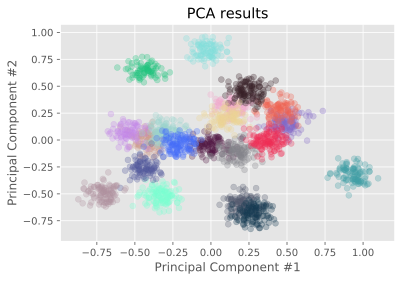

In [8]:
#we want to loop over each cluster

unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    #enumerate will give us count for each
    X_data = res_pca[y_test == unique_label]
    plt.scatter(X_data[:,0],
                X_data[:,1],
                alpha = 0.3, #will make them not overlap to be visually
                c=cols[index]   #will color according to index
               )

plt.xlabel('Principal Component #1')
plt.ylabel('Principal Component #2')
plt.title('PCA results')

<a id='task4'></a>
# Task 4: Autoencoder Theory and Training
![title](Images/ae_viz.pdf)

In [9]:
autoencoder = MLPRegressor(alpha = 1e-15, #learning rate
                           hidden_layer_sizes = (50, 100, 50, 2, 50, 100, 50),
                           #feed as tuple
                           #we have 50 dimensions so to make fully connected we can also give it 50
                           #100 make it bigger
                           #get it again 50
                           #the 2 we want
                           #the decoder mirror
                           random_state = 1,
                           max_iter = 20000    #to make sure our model is learning correctly
                            )
autoencoder.fit(X_train, X_train)

MLPRegressor(activation='relu', alpha=1e-15, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(50, 100, 50, 2, 50, 100, 50),
             learning_rate='constant', learning_rate_init=0.001, max_iter=20000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

<a id='task5'></a>
# Task 5: Reducing Dimensionality with Encoder

In [10]:
W = autoencoder.coefs_
#weights
#coefficients
biases = autoencoder.intercepts_

In [11]:
for w in W:
    print(w.shape)

(50, 50)
(50, 100)
(100, 50)
(50, 2)
(2, 50)
(50, 100)
(100, 50)
(50, 50)


In [12]:
encoder_weights = W[0:4]
encoder_biases = biases[0:4]

In [13]:
#we need to add non-linearity by relu
def encode(encoder_weights, encoder_biases, data):
    res_ae = data
    for index, (w, b) in enumerate(zip(encoder_weights, encoder_biases)):
        if index+1 == len(encoder_weights):
            res_ae = res_ae@w+b
        else:
            res_ae = np.maximum(0, res_ae@w+b)
    return res_ae

res_ae = encode(encoder_weights, encoder_biases, X_test)
            
# @ is dot function
# we don't want to put non-linearity if in end of encoder phase
#we need to make if statement to only apply this np.maximum if we are not in final laye


In [14]:
res_ae.shape

(2000, 2)

Text(0.5, 1.0, 'Autoencoder Results')

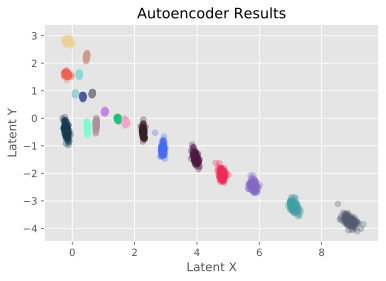

In [15]:
unique_labels = np.unique(y_test)

for index, unique_label in enumerate(unique_labels):
    latent_space = res_ae[y_test==unique_label]
    #we want each cluster to color them appropriately
    
    plt.scatter(latent_space[:,0],    #our first dimension
                latent_space[:,1],    #our second dimension
                alpha = 0.3,
                c=cols[index])

plt.xlabel('Latent X')
plt.ylabel('Latent Y')
plt.title('Autoencoder Results')

#our clusters are more independent with less interference amongst them
#this means the autoencoder has worked well
#the information of cluster identification is still present

In [16]:
#autoencoder 2D space is not better than PCA, we can test using clustering algorithms
#silhoutte square for -1 bad to 1 best
#the closer to 1, the better clustering

silhouette_score(X_test, y_test)

0.6100948647899368

In [17]:
silhouette_score(res_pca, y_test)

#pca performs poorly as there is overlap, although not visually apparent

0.36785640563640387

In [18]:
silhouette_score(res_ae, y_test)

#in terms of clustering, our autoencoder has better representation of data itself

0.80746596020172434